<a href="https://colab.research.google.com/github/Sairindhrijena/Netflix-Movies-and-TV-Shows-Clustering/blob/main/Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name-**Netflix_Movies_and_TV_Shows_Clustering



*   **Project Type-**Unsupervised
*   **Contribution-**Indivisual



#**Project Summary-**


*   Netflix, is an American subscription streaming service and production company. It was founded in 1997 by Reed Hastings and Marc Randolph in Scott’s Valley, California.
* It offers a library of films and television series through distribution deals as well as its own productions, known as Netflix Originals.



*  Our objective is to conduct an Exploratory Data Analysis to understand what content is available in different countries and if Netflix has been increasingly focusing on TV rather than movies in recent years. And use these insights to cluster similar content by matching text-based features.


*  After loading the data, we start by observing the first and last five values to understand the dataset. Next, we treat the null values by dropping them if the respective variables contain <1% of null values. This is followed by feature engineering to extract new variables from the datetime variable date_added.


*   This cleaned data is then used to conduct EDA in order to understand it better and identify the underlying trends.
*  Once obtained the required insights from the EDA, we start with Pre-processing the text data by removing the punctuation, and, stop words. This filtered data is passed through TF - IDF Vectorizer since we are conducting a text-based clustering and the model needs the data to be vectorized in order to predict the desired results.



*   Finally, K–Means clustering is utilized to form 10 distinct clusters with similar data points.
*  Using the data provided, we also implemented a simple recommender system that successfully generates Ten similar Movies or Tv-Shows for the given title.










#**GitHub Link -**

# **Problem Statement-**




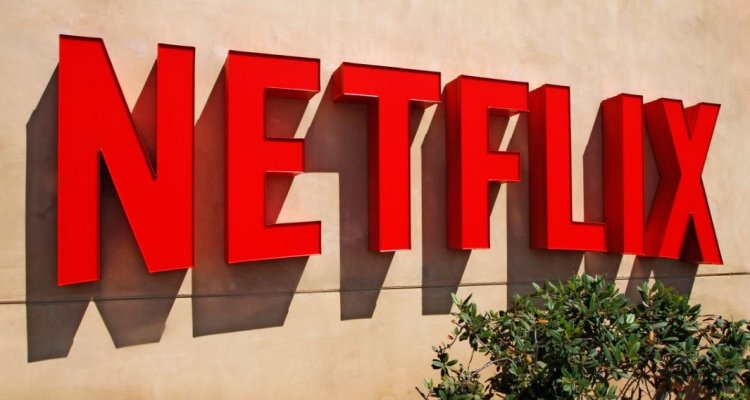


  This dataset consists of tv shows and movies available on Netflix as of 2021. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.



                              
*   Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.
*   In this project, you are required to do Exploratory Data Analysis.


*  Understanding what type content is available in different countries.
*   Is Netflix has increasingly focusing on TV rather than movies in recent years.


*   Clustering similar content by matching text-based features.


# **Let's Begin !**

## **1. Know Your Data**

### **Import Libraries**

In [2]:
# Import Libraries and modules

# libraries that are used for analysis and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS ,ImageColorGenerator
import re, string, unicodedata

# libraries used to process textual data
import string
string.punctuation
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import missingno as msno
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.tokenize import TweetTokenizer

import datetime as dt

# libraries used to implement clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# libraries that are used to construct a recommendation system
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Library of warnings would assist in ignoring warnings issued
import warnings;warnings.filterwarnings("ignore")
import warnings;warnings.simplefilter('ignore')
#import stats 
from scipy import stats


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### **Dataset Loading**

In [3]:
data = pd.read_csv('/content/drive/MyDrive/CAPSTONE PROJECT-4/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### **Dataset First View**

In [4]:
# Dataset First Look
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### **Dataset Rows & Columns count**

In [5]:
# Dataset Rows & Columns count
rows=data.shape[0]
columns=data.shape[1]
print(f"The no of rows is {rows} and no of columns is {columns}")

The no of rows is 7787 and no of columns is 12


### **Dataset Information**

In [6]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


### **Duplicate Values**

In [7]:
# Dataset Duplicate Value Count
print(f'The number of duplicate rows are {data.duplicated().sum()}')

The number of duplicate rows are 0


### **Missing Values/Null Values**

In [8]:
# Missing Values/Null Values Count
data.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

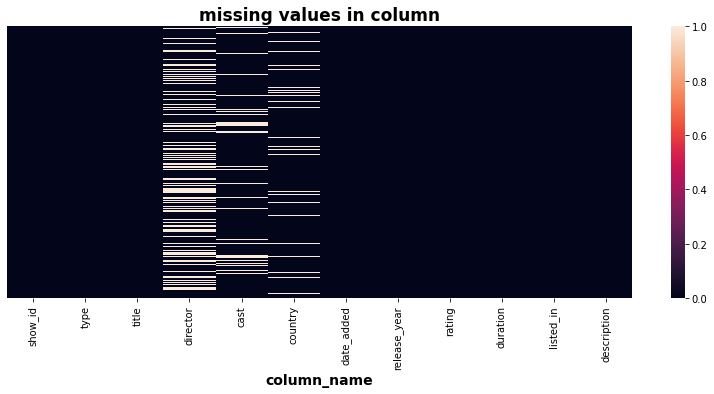

In [9]:
# Visualizing the missing values
plt.figure(figsize=(14, 5))
sns.heatmap(data.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=17)
plt.show()

### **What did you know about your dataset?**



*  There are 7787 rows and 12 columns in the dataset. In the director, cast, country, date_added, and rating columns, there are missing values. The dataset does not contain any duplicate values.

*  Every row of information we have relates to a specific movie. Therefore, we are unable to use any method to impute any null values. Additionally, due to the small size of the data, we do not want to lose any data, so after analyzing each column, we simply impute numeric values using an empty string in the following procedure.



# **2. Understanding Your Variables**

In [10]:
# Dataset Columns
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [11]:
# Dataset Describe
data.describe(include='all')
     

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### **Variables Description**



*   **show_id :**Unique ID for every Movie / Tv Show

*     **type    :**Identifier - A Movie or TV Show

*   **title :**Title of the Movie / Tv Show
* **director :**Director of the Movie


*   **cast :**Actors involved 


*   **country :**Country of production


*  **date_added :** Date it was added on Netflix

*  **release_year:** Actual Releaseyear of the movie / show
*   **rating :**TV Rating of the movie / show


* **duration :**Total Duration - in minutes or number of seasons
***listed_in :** Genere


*   **description :** The Summary description








### **Check Unique Values for each variable**

In [12]:
from pandas.core.base import DataError
# Check Unique Values for each variable.
for i in data.columns.tolist():
  print("No. of unique values in ",i,"is",data[i].nunique())

No. of unique values in  show_id is 7787
No. of unique values in  type is 2
No. of unique values in  title is 7787
No. of unique values in  director is 4049
No. of unique values in  cast is 6831
No. of unique values in  country is 681
No. of unique values in  date_added is 1565
No. of unique values in  release_year is 73
No. of unique values in  rating is 14
No. of unique values in  duration is 216
No. of unique values in  listed_in is 492
No. of unique values in  description is 7769


# **3. Data Wrangling**

###**Data Wrangling Code**

In [13]:
# Write your code to make your dataset analysis ready.
# Top countries
data.country.value_counts()

United States                                                   2555
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

In [14]:
# Genre of shows
data.listed_in.value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
Stand-Up Comedy & Talk Shows, TV Mysteries, TV Sci-Fi & Fantasy                      1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 492, dtype: int64

In [16]:
# Changing the values in the rating column
rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}

data['rating'].replace(rating_map,inplace = True)
data['rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids', nan],
      dtype=object)

In [17]:
# Handling the missing values

# The missing values in the director, cast, and country attributes can be replaced with 'Unknown'
data[['director','cast','country']] = data[['director','cast','country']].fillna('Unknown')

# The missing values in rating can be imputed with its mode, since this attribute is discrete.
data['rating'].fillna(value=data['rating'].mode()[0],inplace=True)
     

In [18]:
# Choosing the primary country and primary genre to simplify the analysis
data['country'] = data['country'].apply(lambda x: x.split(',')[0])
data['listed_in'] = data['listed_in'].apply(lambda x: x.split(',')[0])

In [20]:
# contry in which a movie was produced
data.country.value_counts()
     

United States     2883
India              956
United Kingdom     577
Unknown            507
Canada             259
                  ... 
Zimbabwe             1
Namibia              1
Soviet Union         1
Iran                 1
Somalia              1
Name: country, Length: 82, dtype: int64

In [21]:
# genre of shows
data.listed_in.value_counts()

Dramas                          1384
Comedies                        1074
Documentaries                    751
Action & Adventure               721
International TV Shows           690
Children & Family Movies         502
Crime TV Shows                   369
Kids' TV                         359
Stand-Up Comedy                  321
Horror Movies                    244
British TV Shows                 232
Docuseries                       194
Anime Series                     148
International Movies             114
TV Comedies                      110
Reality TV                       102
Classic Movies                    77
TV Dramas                         62
Movies                            56
Thrillers                         49
TV Action & Adventure             37
Stand-Up Comedy & Talk Shows      33
Romantic TV Shows                 28
Classic & Cult TV                 21
Independent Movies                20
Anime Features                    19
Music & Musicals                  17
T

In [22]:
# Splitting the duration column, and changing the datatype to integer
data['duration'] = data['duration'].apply(lambda x: int(x.split()[0]))

In [23]:
# Number of seasons for tv shows
data[data['type']=='TV Show'].duration.value_counts()

1     1608
2      382
3      184
4       87
5       58
6       30
7       19
8       18
9        8
10       6
11       3
13       2
12       2
15       2
16       1
Name: duration, dtype: int64

In [24]:
# Movie length in minutes
data[data['type']=='Movie'].duration.unique()

array([ 93,  78,  80, 123,  95, 119, 118, 143, 103,  89,  91, 149, 144,
       124,  87, 110, 128, 117, 100,  84,  99,  90, 102, 104, 105,  56,
       125,  81,  97, 106, 107, 109,  44,  75, 101,  37, 113, 114, 130,
        94, 140, 135,  82,  70, 121,  92, 164,  53,  83, 116,  86, 120,
        96, 126, 129,  77, 137, 148,  28, 122, 176,  85,  22,  68, 111,
        29, 142, 168,  21,  59,  20,  98, 108,  76,  26, 156,  30,  57,
       150, 133, 115, 154, 127, 146, 136,  88, 131,  24, 112,  74,  63,
        38,  25, 174,  60, 153, 158, 151, 162,  54,  51,  69,  64, 147,
        42,  79,  40,  45, 172,  10, 163,  55,  72,  61,  71, 160, 171,
        48, 139, 157,  15,  65, 134, 161,  62, 186,  49,  73,  58, 165,
       166, 138, 159, 141, 132,  52,  67,  34,  66, 312, 180,  47, 155,
        14, 177,  11,   9,  46, 145,   8,  12,  43,  50,  23, 185, 200,
       169,  27, 170, 196,  33, 181, 204,  32,  35, 167, 179, 193,  13,
       214,  17, 173, 192, 209, 187,  41, 182, 224, 233, 189, 15

In [26]:
# datatype of duration
data.duration.dtype

dtype('int64')

In [27]:
# Converting 'date_added' from string to datetime
data["date_added"] = pd.to_datetime(data['date_added'])

In [28]:
# first and last date on which a show was added on Netflix
data.date_added.min(),data.date_added.max()
     

(Timestamp('2008-01-01 00:00:00'), Timestamp('2021-01-16 00:00:00'))

In [29]:
# Adding new attributes month_added & year_added from date_added column
data['month_added'] = data['date_added'].dt.month
data['year_added'] = data['date_added'].dt.year

# Drop date_added column
data.drop('date_added', axis=1, inplace=True)

In [31]:
# New Dataset Rows & Columns 
data.shape

(7787, 13)

In [33]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       7787 non-null   object 
 1   type          7787 non-null   object 
 2   title         7787 non-null   object 
 3   director      7787 non-null   object 
 4   cast          7787 non-null   object 
 5   country       7787 non-null   object 
 6   release_year  7787 non-null   int64  
 7   rating        7787 non-null   object 
 8   duration      7787 non-null   int64  
 9   listed_in     7787 non-null   object 
 10  description   7787 non-null   object 
 11  month_added   7777 non-null   float64
 12  year_added    7777 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 791.0+ KB


## **What all manipulations have you done and insights you found?**



*   There are some movies / TV shows that were filmed in multiple countries, have multiple genres associated with it.

*   To simplify the analysis, let's consider only the primary country where that respective movie / TV show was filmed. Also, let's consider only the primary genre of the respective movie / TV show and changed datatype.



* The shows were added on Netflix between 1st January 2008 and 16th January 2021.
*  Now our dataset is completely ready for EDA.



